# Regression Analysis:

It is a set of statistical processes for estimating the relationships(predicting) between a dependent variable(output) and one or more independent variables(input: predictors/features)

#Introduction to Neural Network Regression with TF

#Anatomy of Neural Networks:
Neural Network consists of three layers.


1.   Input layer: data goes in here
2.   Hidden layer: learns patterns in data
3.   Output layer: outputs learned representation or prediction probabilities



#Architecture of Neural Network:


Hyperparameters and their typical values:

1.   Input layer shape: Same shape as number of features
2.   Hidden layer(s): Problem specific, minimum = 1, maximum = unlimited
3.   Neurons per hidden layer: Problem specific, generally 10 to 100
4.   Output layer shape: Same shape as desired prediction shape
5.   Hidden activation: Usually Rectified Linear Unit(ReLU)
6.   Output activation: None, ReLU, logistic/tanh
7.   Loss function: MSE(Mean Square Error) or MAE(Mean Absolute Error)/Huber (Combination of MAE/MSE) if outliers
8.   Optimizer: SGD(Stochastic Gradient Descent), Adam

Hyperparameter(human-changeable value): In ML, it's something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own(a value not explicitly set by an analyst)


In [1]:
#Import tensorflow and view it's version

import tensorflow as tf
print(tf.__version__)

2.9.2


#Data view and fit

In [2]:
#import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#create the input variables/features:independent variable

x = np.array([ 0. ,2., 4., 6., 8., 10., 12., 14., 16., 18., 20.])

In [4]:
#create output variables/labels:dependent variable

y = np.array([1., 3., 5., 7., 9., 11., 13.,  15., 17., 19., 21.])

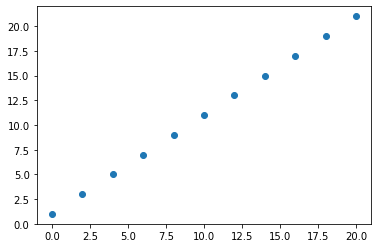

In [5]:
#visualising x and y values

plt.scatter(x, y)

In [6]:
#check the relationship between x and y

y == (x+1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

##Input and Output shapes

In [7]:
# creating a tensor for housing price prediction problem

house_info = tf.constant(["Bedroom", "Bathroom", "Garage"])       #input
house_price = tf.constant([222200])       #output
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([222200], dtype=int32)>)

In [8]:
#shapes

input_shape = house_info.shape
output_shape = house_price.shape
input_shape, output_shape


(TensorShape([3]), TensorShape([1]))

In [9]:
house_info.ndim    #vector

1

In [10]:
house_info[0].ndim        #scalar

0

In [11]:
house_info[0].numpy(), house_price[0].numpy()       #values of at index 0 

(b'Bedroom', 222200)

In [12]:
x[0], y[0]        #values of x and y at index 0 

(0.0, 1.0)

In [13]:
x[0].ndim       #scalar

0

In [14]:
x = tf.constant(x)
x

<tf.Tensor: shape=(11,), dtype=float64, numpy=array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])>

In [15]:
y = tf.constant(y)
y

<tf.Tensor: shape=(11,), dtype=float64, numpy=array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.])>

In [16]:
#since by default the tensors are made with dtype-float64, let's change it into float32

x = tf.cast(x, dtype=tf.float32)
y = tf.cast(y, dtype = tf.float32)
x, y

(<tf.Tensor: shape=(11,), dtype=float32, numpy=
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
       dtype=float32)>, <tf.Tensor: shape=(11,), dtype=float32, numpy=
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.],
       dtype=float32)>)

#Modelling steps in TF:

1.   Data ready: get the data ready by turning into tensors, define input, hidden and output layers of a deep learning model.
2.   Pick/compile a model: define the loss function which tells our model how wrong it is, define the optimizer which tells our model how to improve its pattern learning
3.   Fit the model: Allow the model to find patterns(relationship) between x(input variables) and y(output variable) to make a prediction.
4.    Evaluate the model:evaluation metrics to know what to use to interpret the performance of our model.
5.    Improve through experimentation
6.    Save and reload your model




 

In [17]:
#set random seed

tf.random.set_seed(22)

#Keras: 
It is a deep learning API which provides a plenty of pre-built layers for different Neural Network architectures and purposes via Keras Layers API.

##Creating a model

###Sequential model

It is used to build a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Its layers are accessible via the 'layers' attribute.

add()-adds layers, 
pop()-removes layers



###Dense:
It is a Neural Network layer that has deep connection, meaning that each neuron in dense layer receives input from all neurons of its previous layer.

It performs matrix vector multiplication by generating 'n' dimensional vector. The values used in the matrix are parameters that can be trained and updated with the help of backpropogation.

It is used for changing dimensions, rotation, scaling and translation of the vector



In [18]:
#1. Create a model using the Sequential API

model = tf.keras.Sequential()   #you can add the layers by using .add()
model.add(tf.keras.layers.Dense(1))  #dense=no. of inputs or outputs you are taking at a time
#these two lines of code can also be written as:
#model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1)
#])

##Compiling the model

In [19]:
#2. Compile the model

model.compile(loss = tf.keras.losses.mae,   #mae-Mean Absolute value
              optimizer = tf.keras.optimizers.SGD(),    #sgd-Stochastic Gradient Descent
              metrics = ["mae"])


###Optimizer

It tells how your model should update its internal patterns to better its predictions

###Metrics

It's human interpretable values for how well your model is doing

###Loss

Loss tells us how wrong your model's predictions are compared to the truth labels

loss = mean(abs(y_actual - y_pred), axis=-1)

so to make a good model, we need to minimise the loss value

###Epochs

It tells how many times our model will go through all of the training examples.

epochs= no.of laps

##Fitting the model

In [21]:
#3. Fit the model

model.fit(tf.expand_dims(x, axis = -1), y, epochs=5)     

#you are expanding the dimensions of 'x' because TF 2.7.0+ versions need ndim=2 shaped tensor
#by expanding x our x ndim shape will expand from 1 to 2, which is what our model needs to fit.

Epoch 1/5
1/1 [==============================] - 1s 541ms/step - loss: 12.3746 - mae: 12.3746
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3646 - mae: 11.3646
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 10.3546 - mae: 10.3546
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 9.3446 - mae: 9.3446
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 8.3346 - mae: 8.3346


In [20]:
#we have got loss of approx 8

In [22]:
x

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
      dtype=float32)>

In [23]:
y

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.],
      dtype=float32)>

In [24]:
#predicting a value with our model for x = 22.0 which should give y=23

model.predict([22.0])

1/1 [==============================] - 0s 126ms/step


array([[8.025777]], dtype=float32)

In [25]:
#since the loss is 8, so if we add up the loss to predicted y value, we get 8+8=16
#but our actual predicted value should be 23 
#which means we need to improve our model by handling the errors

##Improving the model

We can improve our model, by altering the steps we took to create a model.

1. Creating a model:

    Here, we might add more layers, increase the no.of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.

2. Compiling the model:

    Here, we might change the optimization function or perhaps the 'learning rate' of the optimization function.

3. Fitting the model:

    Here, we might fit a model for more 'epochs'(leave it getting trained for longer times) or on more data(give the model more examples to learn from).

In [26]:
#Rebuilding the model

#1. Create a model

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

#2. Compile the model

model.compile(loss=tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model by training for longer time

model.fit(tf.expand_dims(x, axis=-1), y , epochs=100)



Epoch 1/100
1/1 [==============================] - 0s 342ms/step - loss: 4.3411 - mae: 4.3411
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 3.3664 - mae: 3.3664
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 2.4338 - mae: 2.4338
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 1.5245 - mae: 1.5245
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7688 - mae: 0.7688
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4853 - mae: 0.4853
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6681 - mae: 0.6681
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4794 - mae: 0.4794
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6688 - mae: 0.6688
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4734 - mae: 0.4734
Epoch 11/100
1/1 [==============================] - 0s 31ms/step - loss:

In [27]:
#now lets predict a value with our model for x = 22.0 which should give y=23

model.predict([22.0])

1/1 [==============================] - 0s 150ms/step


array([[22.76674]], dtype=float32)

In [28]:
#Common ways to improve a deep model:
#1. Adding layers
#2. Increase the number of hidden units
#3. Change the activation functions
#4. Change the optimization function
#5. Change the learning rate
#6. Fitting on more data
#7. Fitting for longer(epoch)

##Evaluating a model:

The workflow of building a neural network is:

Create a model-> fit it-> evaluate it-> improve/build(tweak) it-> fit it-> evaluate it-> tweak it-> fit it..........

Evaluating can be done by visualizing the following:

*   The data: What data we are working with? What does it look like?

*   The model itself: What does our model look like?

*   The training of a model: How does a model perform while it learns?

*   The predictions of the model: How do the predictions of a model line up against the original labels?





In [29]:
#Creating a bigger dataset

x = np.arange(-100, 100, 2)
x

array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98])

In [30]:
y = x + 5
y

array([-95, -93, -91, -89, -87, -85, -83, -81, -79, -77, -75, -73, -71,
       -69, -67, -65, -63, -61, -59, -57, -55, -53, -51, -49, -47, -45,
       -43, -41, -39, -37, -35, -33, -31, -29, -27, -25, -23, -21, -19,
       -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,   7,
         9,  11,  13,  15,  17,  19,  21,  23,  25,  27,  29,  31,  33,
        35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,  59,
        61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,
        87,  89,  91,  93,  95,  97,  99, 101, 103])

In [31]:
len(x), len(y)

(100, 100)

In [32]:
#Splitting the dataset into training(80%)/test set(20%)

x_train = x[:80]
y_train = y[:80]

x_test = x[80:]
y_test = y[80:]


In [33]:
x_train.shape, x_test.shape

((80,), (20,))

In [34]:
len(y_train), len(y_test)

(80, 20)

###Visualizing the data:

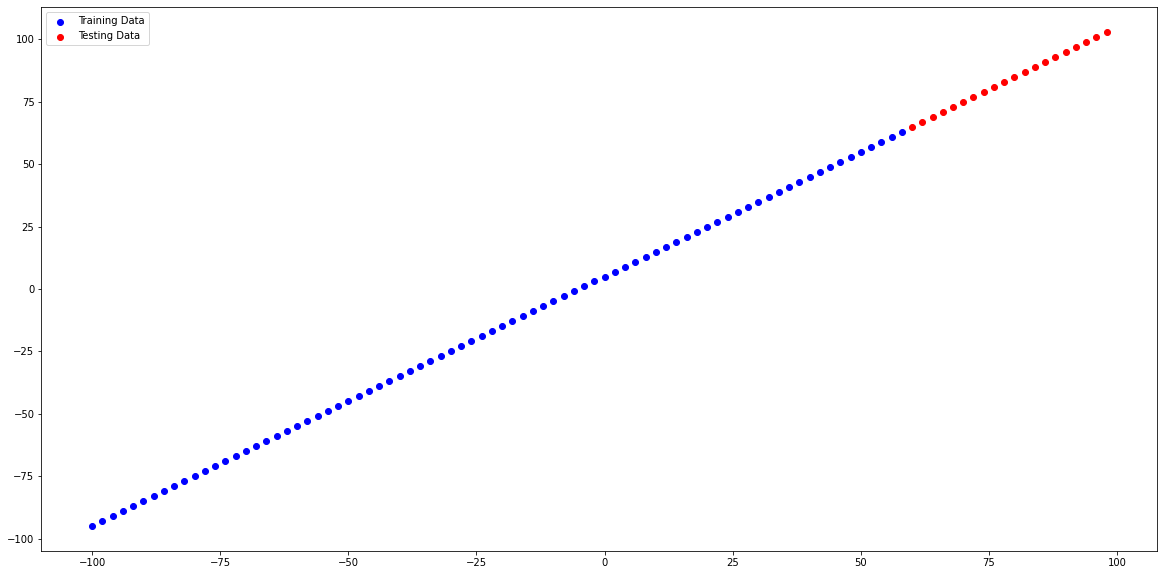

In [35]:
plt.figure(figsize=(20,10))

#plotting training dataset in blue

plt.scatter(x_train, y_train, c = 'b', label = 'Training Data')

#plotting testing dataset in red

plt.scatter(x_test, y_test, c = 'r', label = 'Testing Data')

#Displaying the legend

plt.legend()

In [36]:
x_test.shape

(20,)

##Building model-1

In [37]:
#Building a model

#set random seed

tf.random.set_seed(22)

#Create a model

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, name="input_new")
    ], name= "model_1"
)

#Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#Fit the model

model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs = 50, verbose = 0)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_new (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


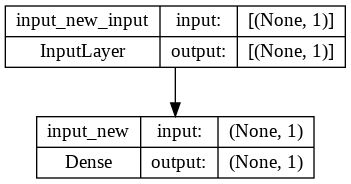

In [39]:
#viewing a 2D plot of the model

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

##Visualizing the Predictions

by plotting the predicted values against the actual values.

In [40]:
#Predicting the values

y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 84ms/step


array([[ 66.19651 ],
       [ 68.38409 ],
       [ 70.571655],
       [ 72.759224],
       [ 74.9468  ],
       [ 77.13437 ],
       [ 79.32194 ],
       [ 81.509514],
       [ 83.69708 ],
       [ 85.88465 ],
       [ 88.07223 ],
       [ 90.259796],
       [ 92.447365],
       [ 94.63494 ],
       [ 96.82251 ],
       [ 99.01008 ],
       [101.197655],
       [103.38522 ],
       [105.57279 ],
       [107.76037 ]], dtype=float32)

In [41]:
y_test

array([ 65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,  89,
        91,  93,  95,  97,  99, 101, 103])

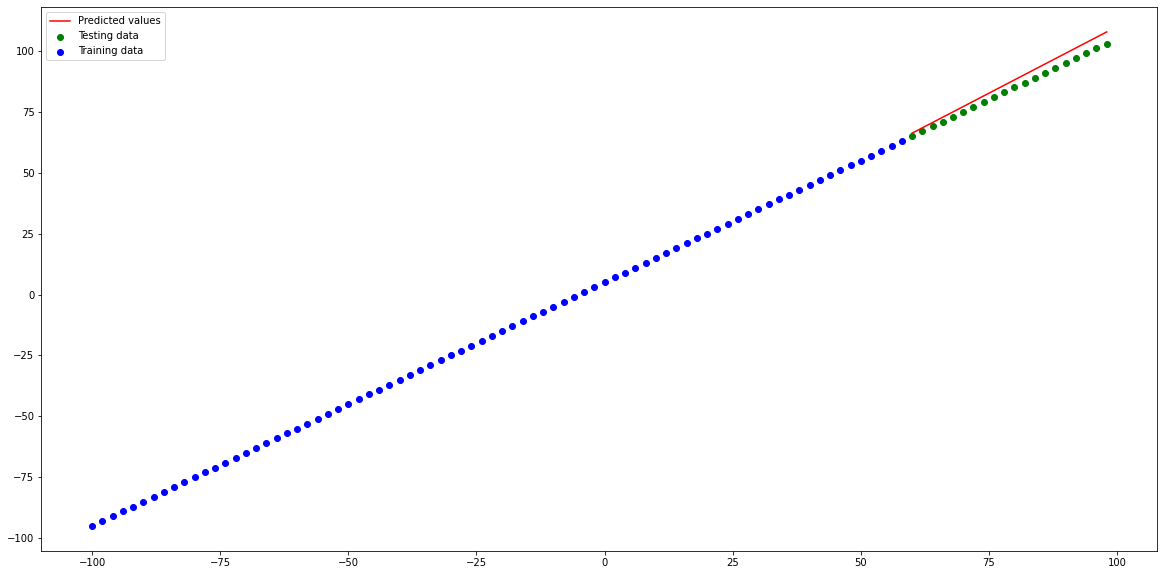

In [42]:
#Visualizing a scatter plot graph to compare the predicted values with the actual values

plt.figure(figsize = (20,10))
#plotting the test data in green
plt.scatter(x_test, y_test, c = "g", label = "Testing data")

#plotting the training data in blue
plt.scatter(x_train, y_train, c = "b", label = "Training data")

#plotting the predicted values in red
plt.plot(x_test, y_pred, c = "r", label = "Predicted values")

plt.legend()

##Evaluating the predictions

Like the visualizations, we have another option to evaluate our model using the evaluation metrics.

The two main metrics used for regression problems are:

**MAE**-Mean Absolute Error: it's the mean difference between each of the predictions.

**MSE**-Mean Squared Error: it's the squared mean difference between the predictions: it's used if the errors are large and are more detrimental than smaller errors.

**Huber**- it's the combination of mae and mse, which is less sensitive to outliers than mse

Hence, the lower these values are, the better our model will be able to predict.

In [43]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 413ms/step - loss: 2.9784 - mae: 2.9784


[2.9784393310546875, 2.9784393310546875]

In [44]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae.numpy()

array([17.923141 , 16.092731 , 14.499842 , 13.144465 , 12.0266   ,
       11.159689 , 10.535612 , 10.149049 , 10.       , 10.088465 ,
       10.414446 , 10.977939 , 11.778946 , 12.8174715, 14.093506 ,
       15.608063 , 17.37789  , 19.385223 , 21.572792 , 23.760368 ],
      dtype=float32)

In [45]:
#since y_test and y_pred are of different shapes, we got these many values.

In [46]:
# Check the tensor shapes
y_test.shape, y_pred.shape

((20,), (20, 1))

In [47]:
#so, let's remove the 1-Ds in y_pred

y_test.shape, y_pred.squeeze().shape

((20,), (20,))

In [48]:
# now let's calculate the MAE again

mae_1 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred.squeeze()).numpy()
mae_1

2.9784393

In [49]:
# Calculating the MSE
mse_1 = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred.squeeze()).numpy()
mse_1

10.040935

#Running experiments to improve the model

##Building model-2

In [50]:
#Building a model

#set random seed

tf.random.set_seed(22)

#Create a model

model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, name="input_new"),
        tf.keras.layers.Dense(1, name="input1_new"),
        tf.keras.layers.Dense(1, name="input2_new"),
        tf.keras.layers.Dense(1, name="output_new")
    ], name= "model_2"
)

#Compile the model

model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#Fit the model

model2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs = 50, verbose = 0)

In [51]:
#making and plotting predictions for model-2

y_pred_2 = model2.predict(x_test)

1/1 [==============================] - 0s 134ms/step


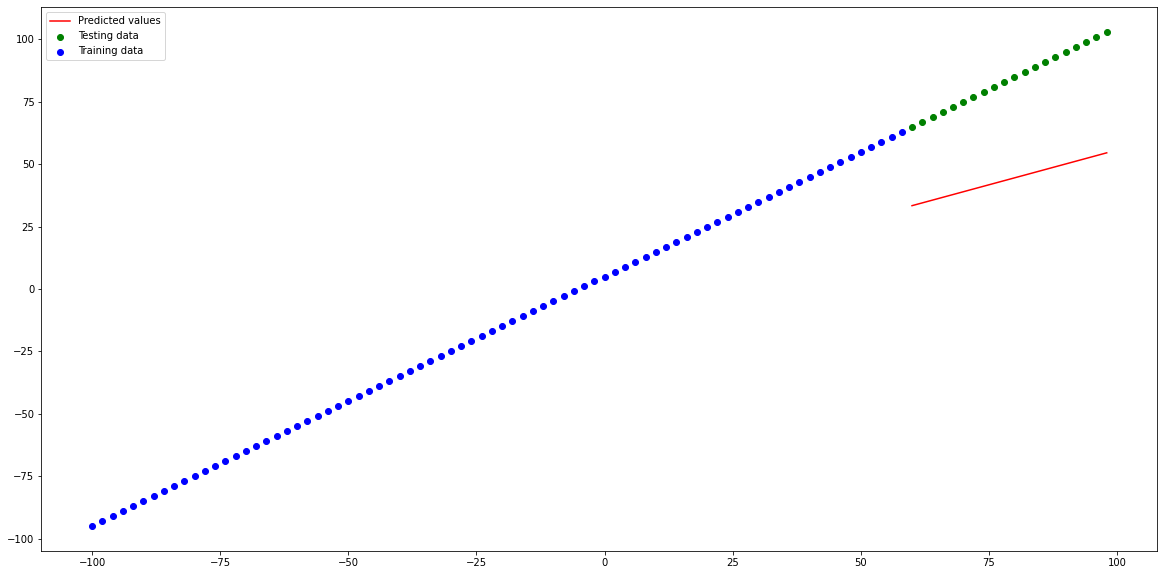

In [52]:
#Visualizing a scatter plot graph to compare the predicted values with the actual values

plt.figure(figsize = (20,10))
#plotting the test data in green
plt.scatter(x_test, y_test, c = "g", label = "Testing data")

#plotting the training data in blue
plt.scatter(x_train, y_train, c = "b", label = "Training data")

#plotting the predicted values in red
plt.plot(x_test, y_pred_2, c = "r", label = "Predicted values")

plt.legend()

In [53]:
#increasing the no.of dense layers are having bad changes


In [54]:
# Calculate model_2 metrics
mae_2 = tf.metrics.mean_absolute_error(y_test, y_pred_2.squeeze()).numpy()
mse_2 = tf.metrics.mean_squared_error(y_test, y_pred_2.squeeze()).numpy()

mae_2, mse_2

(40.033043, 1628.7123)

##Building model-3-increasing epoch 

In [55]:
#Building a model

#set random seed

tf.random.set_seed(22)

#Create a model

model3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, name="input_new")
    ], name= "model_3"
)

#Compile the model

model3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#Fit the model

model3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs = 650, verbose = 0)

In [56]:
#making and plotting predictions for model-2

y_pred_3 = model3.predict(x_test)

1/1 [==============================] - 0s 43ms/step


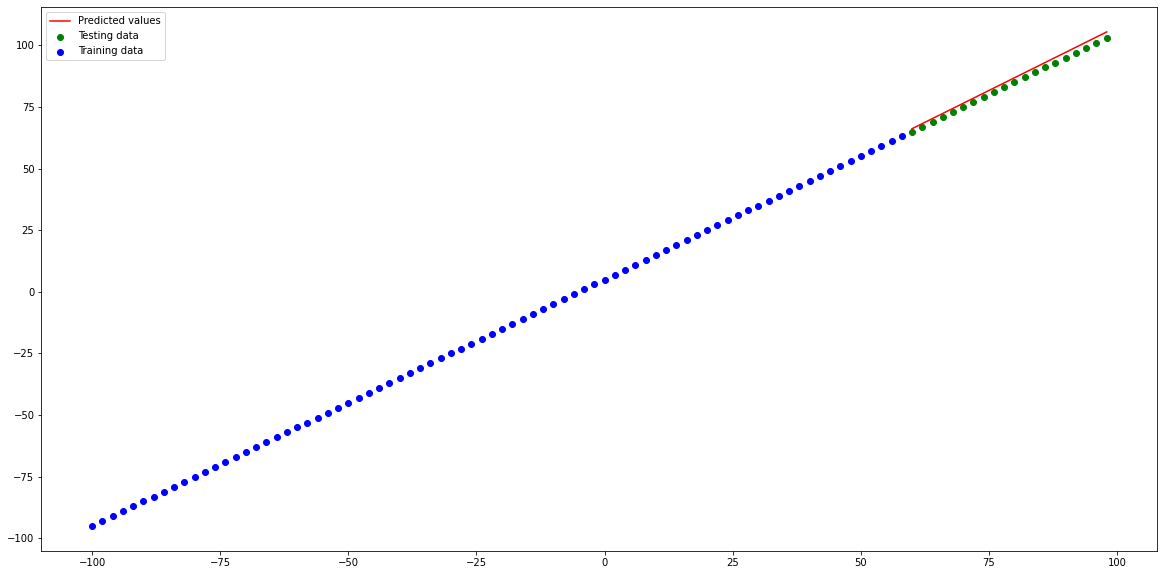

In [57]:
#Visualizing a scatter plot graph to compare the predicted values with the actual values

plt.figure(figsize = (20,10))
#plotting the test data in green
plt.scatter(x_test, y_test, c = "g", label = "Testing data")

#plotting the training data in blue
plt.scatter(x_train, y_train, c = "b", label = "Training data")

#plotting the predicted values in red
plt.plot(x_test, y_pred_3, c = "r", label = "Predicted values")

plt.legend()

In [58]:
# Calculate model_3 metrics
mae_3 = tf.metrics.mean_absolute_error(y_test, y_pred_3.squeeze()).numpy()
mse_3 = tf.metrics.mean_squared_error(y_test, y_pred_3.squeeze()).numpy()

mae_3, mse_3

(1.7760407, 3.3005815)

In [59]:
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_new (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [60]:
#Let's compare our models' results

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [61]:
#Let's view the models' results in the form of a dataframe

import pandas as pd
models_score = pd.DataFrame(model_results, columns = ["Model", "MAE", "MSE"])
models_score

,Model,MAE,MSE
0,model_1,2.978439,10.040935
1,model_2,40.033043,1628.712280
2,model_3,1.776041,1.776041


In [62]:
#It tells that, model_3 has performed the best
#This is a part of ML modelling in which we try many different combinations of models and see which performs best.

#Tracking the experiments: 

to see which one performs better than the rest...

#Saving the model:

There are two ways to save a model in TF,
1. The SavedModel format-default(it saves custom objects like special layers without additional modifications when loading the model back in)

2. The HDF5 format

Both of the methods use the same method call

In [63]:
#saving the model using the SavedModel format

model3.save('best_model_SavedModel_format')

In [64]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


#Loading the model

In [65]:
#Load the model from the SavedModel format

In [66]:
# Load the model from the SavedModel format
load_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
load_saved_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_new (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#Downloading the model from Google Colab:

you can download by:

1. Right clicking on the file in the files pane and click on 'download'
2. Using the below code.

In [67]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_SavedModel_format")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>